# Analyse du marché immobilier avec le projet Python


In [189]:
#IMPORTATION DES BIBLIO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [190]:
import pandas as pd

# Lecture du fichier CSV des clients avec les en-têtes appropriés
# Si le fichier pose problème, on peut spécifier encoding='utf-8' si nécessaire
clients_df = pd.read_csv("customers.csv")

# Lecture du fichier CSV des propriétés
proprietes_df = pd.read_csv("properties.csv")

# Nettoyage du DataFrame des clients
# Suppression des lignes qui sont entièrement vides (NaN)
clients_df = clients_df.dropna(how='all')

# Réinitialisation de l'index pour avoir une séquence propre
clients_df = clients_df.reset_index(drop=True)

# Concaténation des DataFrames
# Utilisation d'une jointure externe pour conserver toutes les données des deux DataFrames
df_combine = pd.concat([clients_df, proprietes_df], axis=1)

# Nettoyage des valeurs NaN restantes si nécessaire
df_combine = df_combine.fillna('')  # Décommenter cette ligne pour remplacer les NaN par des chaînes vides

In [191]:
# Affichage des premières lignes pour vérifier le résultat
print("Dimensions du DataFrame combiné:", df_combine.shape)
print("\nPremières lignes du DataFrame combiné:")
df_combine.head()

Dimensions du DataFrame combiné: (267, 23)

Premières lignes du DataFrame combiné:


,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0.0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4.0,Yes,Website,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1.0,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1.0,No,Website,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2.0,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4.0,Yes,Agency,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3.0,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5.0,No,Website,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4.0,C0174,Company,Marleez,Co,,,USA,California,Investment,5.0,No,Website,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [192]:
df_combine.describe

<bound method NDFrame.describe of      Unnamed: 0 ﻿customerid      entity     name  surname  birth_date sex country       state     purpose deal_satisfaction mortgage   source  Unnamed: 0   ﻿id  building  date_sale       type  property#     area         price  status customerid
0           0.0       C0110  Individual   Kareem      Liu   5/11/1968   F     USA  California        Home               4.0      Yes  Website           0  1030         1  11/1/2005  Apartment         30   743.09  $246,172.68    Sold      C0028 
1           1.0       C0010  Individual  Trystan  Oconnor  11/26/1962   M     USA  California        Home               1.0       No  Website           1  1029         1  10/1/2005  Apartment         29   756.21  $246,331.90    Sold      C0027 
2           2.0       C0132  Individual     Kale      Gay    4/7/1959   M     USA  California        Home               4.0      Yes   Agency           2  2002         2   7/1/2007  Apartment          2   587.28  $209,280.91    Sol

In [193]:
# Affichage des noms de colonnes pour vérifier la structure
print("\nNoms des colonnes:")
print(df_combine.columns.tolist())


Noms des colonnes:
['Unnamed: 0', '\ufeffcustomerid', 'entity', 'name', 'surname', 'birth_date', 'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source', 'Unnamed: 0', '\ufeffid', 'building', 'date_sale', 'type', 'property#', 'area', 'price', 'status', 'customerid']


In [194]:
# Vérifier les colonnes pour savoir lesquelles supprimer
#print(df_combine.columns)

# Supprimer une ou plusieurs colonnes si vous les avez identifiées
#df_combine.drop(df_combine.columns[[0, 13, 14, 22,]], axis=1, inplace=True)  # Exemple avec les indices des colonnes

df_combine


,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0.0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4.0,Yes,Website,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1.0,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1.0,No,Website,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2.0,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4.0,Yes,Agency,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3.0,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5.0,No,Website,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4.0,C0174,Company,Marleez,Co,,,USA,California,Investment,5.0,No,Website,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,,,,,,,,,,,,,,262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,
263,,,,,,,,,,,,,,263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,
264,,,,,,,,,,,,,,264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,
265,,,,,,,,,,,,,,265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,


### Netoyage de df

In [195]:
import pandas as pd

# Supposons que df_combine est déjà chargé

# 1. Nettoyage des noms de colonnes : retirer les espaces et caractères indésirables
df_combine.columns = df_combine.columns.str.strip()  # Retirer les espaces autour des noms de colonnes

# 2. Conversion des colonnes 'birth_date' en format datetime
df_combine['birth_date'] = pd.to_datetime(df_combine['birth_date'], errors='coerce')

# 3. Nettoyage de la colonne 'price' : retirer les signes $ et les virgules, puis convertir en numérique
df_combine['price'] = df_combine['price'].replace({'\$': '', ',': ''}, regex=True)

# Convertir la colonne 'price' en numérique
df_combine['price'] = pd.to_numeric(df_combine['price'], errors='coerce')

# 4. Remplir les valeurs manquantes pour 'price' avec la moyenne
df_combine['price'].fillna(df_combine['price'].mean(), inplace=True)

# 5. Nettoyage de la colonne 'area' : la convertir en numérique si ce n'est pas déjà fait
df_combine['area'] = pd.to_numeric(df_combine['area'], errors='coerce')

# Remplir les valeurs manquantes dans 'area' avec la moyenne
df_combine['area'].fillna(df_combine['area'].mean(), inplace=True)

# 6. Gestion des valeurs manquantes dans la colonne 'status' (par exemple, remplir avec 'Unknown')
df_combine['status'].fillna('Unknown', inplace=True)

# 7. Convertir les colonnes catégorielles en type 'category' pour optimiser la mémoire
categorical_columns = ['entity', 'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source', 'building', 'type']
df_combine[categorical_columns] = df_combine[categorical_columns].apply(lambda x: x.astype('category'))

# 8. Vérification des valeurs manquantes après traitement
missing_values_after = df_combine.isnull().sum()
print("Valeurs manquantes après traitement :")
print(missing_values_after)

# 9. Vérification des types de données après traitement
print("Types de données après nettoyage :")
print(df_combine.dtypes)


Valeurs manquantes après traitement :
Unnamed: 0             0
﻿customerid            0
entity                 0
name                   0
surname                0
birth_date           112
sex                    0
country                0
state                  0
purpose                0
deal_satisfaction      0
mortgage               0
source                 0
Unnamed: 0             0
﻿id                    0
building               0
date_sale              0
type                   0
property#              0
area                   0
price                  0
status                 0
customerid             0
dtype: int64
Types de données après nettoyage :
Unnamed: 0                   object
﻿customerid                  object
entity                     category
name                         object
surname                      object
birth_date           datetime64[ns]
sex                        category
country                    category
state                      category
purpose        

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_12680\687969141.py:12: SyntaxWarning: invalid escape sequence '\$'
  df_combine['price'] = df_combine['price'].replace({'\$': '', ',': ''}, regex=True)


In [196]:
# Vérifier combien de fois NaT apparaît dans la colonne 'birth_date'
nat_count = df_combine['birth_date'].isna().sum()
print(f"Nombre de valeurs NaT dans 'birth_date': {nat_count}")


Nombre de valeurs NaT dans 'birth_date': 112


In [197]:
median_date = df_combine['birth_date'].median()

In [198]:
# Remplacer les NaT par la médiane des dates
df_combine['birth_date'].fillna(median_date, inplace=True)


In [199]:
df_combine.head(8)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0.0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4.0,Yes,Website,0,1030,1,11/1/2005,Apartment,30,743.09,246172.68,Sold,C0028
1,1.0,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1.0,No,Website,1,1029,1,10/1/2005,Apartment,29,756.21,246331.90,Sold,C0027
2,2.0,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4.0,Yes,Agency,2,2002,2,7/1/2007,Apartment,2,587.28,209280.91,Sold,C0112
3,3.0,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5.0,No,Website,3,2031,2,12/1/2007,Apartment,31,1604.75,452667.01,Sold,C0160
4,4.0,C0174,Company,Marleez,Co,1963-07-15,,USA,California,Investment,5.0,No,Website,4,1049,1,11/1/2004,Apartment,49,1375.45,467083.31,Sold,C0014
5,5.0,C0088,Individual,Yurem,Wright,1957-03-06,M,USA,California,Home,3.0,Yes,Website,5,3011,3,9/1/2007,Apartment,11,675.19,203491.85,Sold,C0125
6,6.0,C0079,Individual,Xavier,Faulkner,1947-05-24,M,Canada,,Investment,5.0,No,Website,6,3026,3,9/1/2007,Apartment,26,670.89,212520.83,Sold,C0125
7,7.0,C0149,Individual,Kayden,Olsen,1969-10-17,F,USA,California,Home,5.0,No,Website,7,3023,3,1/1/2008,Apartment,23,720.81,198591.85,Sold,C0166


In [200]:
# Statistiques descriptives pour les variables numériques
numeric_stats = df_combine.describe()
print("Statistiques descriptives des variables numériques:")
print(numeric_stats)


Statistiques descriptives des variables numériques:
                          birth_date  Unnamed: 0          ﻿id   property#         area          price
count                            267  267.000000   267.000000  267.000000   267.000000     267.000000
mean   1962-06-11 12:51:14.157303360  133.000000  2975.142322   27.580524   936.221311  281171.901386
min              1931-02-13 00:00:00    0.000000  1002.000000    1.000000   410.710000  117564.070000
25%              1960-03-06 00:00:00   66.500000  2015.500000   14.500000   756.210000  217553.055000
50%              1963-07-15 00:00:00  133.000000  3024.000000   28.000000   798.280000  249075.660000
75%              1965-06-15 12:00:00  199.500000  4031.500000   40.000000  1121.950000  326964.855000
max              1986-06-21 00:00:00  266.000000  5052.000000   59.000000  1942.500000  538271.740000
std                              NaN   77.220464  1392.197474   15.361437   284.894858   89119.121005


In [201]:
# Assurez-vous que les colonnes numériques sont du bon type
df_combine['price'] = pd.to_numeric(df_combine['price'], errors='coerce')
df_combine['deal_satisfaction'] = pd.to_numeric(df_combine['deal_satisfaction'], errors='coerce')
df_combine['area'] = pd.to_numeric(df_combine['area'], errors='coerce')

# Refaire l'agrégation après avoir corrigé les types de données
building_performance = df_combine.groupby('type').agg({
    'price': ['mean', 'sum', 'min', 'max'],
    'deal_satisfaction': 'mean',
    'area': 'mean'
}).reset_index()

# Afficher les résultats
print("\nPerformances par type de bâtiment:")
print(building_performance)



Performances par type de bâtiment:
        type          price                                    deal_satisfaction        area
                       mean          sum        min        max              mean        mean
0  Apartment  282172.264208  73082616.43  147343.69  538271.74              3.45  939.327027
1     Office  248785.155000   1990281.24  117564.07  410932.67              4.00  835.673750


C:\Users\user\AppData\Local\Temp\ipykernel_12680\3567613738.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  building_performance = df_combine.groupby('type').agg({


In [202]:
# Performances par pays
country_performance = df_combine.groupby('country').agg({
    'price': ['mean', 'sum', 'min', 'max'],
    'deal_satisfaction': 'mean',
    'area': 'mean'
}).reset_index()

# Performances par État
state_performance = df_combine.groupby('state').agg({
    'price': ['mean', 'sum', 'min', 'max'],
    'deal_satisfaction': 'mean',
    'area': 'mean'
}).reset_index()

# Afficher les résultats
print("\nPerformances par pays:")
print(country_performance)

print("\nPerformances par État:")
print(state_performance)



Performances par pays:
   country          price                                    deal_satisfaction         area
                     mean          sum        min        max              mean         mean
0           294347.591714  30906497.13  117564.07  538271.74               NaN   974.752857
1  Belgium  193804.960000    387609.92  191389.87  196220.05          3.000000   704.025000
2   Canada  212520.830000    212520.83  212520.83  212520.83          5.000000   670.890000
3  Denmark  248525.120000    248525.12  248525.12  248525.12          1.000000   756.210000
4  Germany  168834.040000    168834.04  168834.04  168834.04          5.000000   649.690000
5   Mexico  297008.970000    297008.97  297008.97  297008.97          3.000000   957.530000
6   Russia  326755.745000   1307022.98  225050.52  456919.46          2.500000  1084.017500
7       UK  334185.395000    668370.79  310832.59  357538.20          4.000000  1089.935000
8      USA  272367.086986  39765594.70  165430.28  50379

C:\Users\user\AppData\Local\Temp\ipykernel_12680\2939262387.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_performance = df_combine.groupby('country').agg({
C:\Users\user\AppData\Local\Temp\ipykernel_12680\2939262387.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_performance = df_combine.groupby('state').agg({


In [203]:
# Calcul de la fréquence cumulée pour la colonne 'price'
df_combine['price_cumsum'] = df_combine['price'].sort_values().cumsum()

# Afficher les premières lignes pour vérifier
print("\nFréquence cumulée des prix:")
print(df_combine[['price', 'price_cumsum']].head())



Fréquence cumulée des prix:
       price  price_cumsum
0  246172.68   27296719.56
1  246331.90   27543051.46
2  209280.91    9795179.88
3  452667.01   65208251.18
4  467083.31   67978270.65


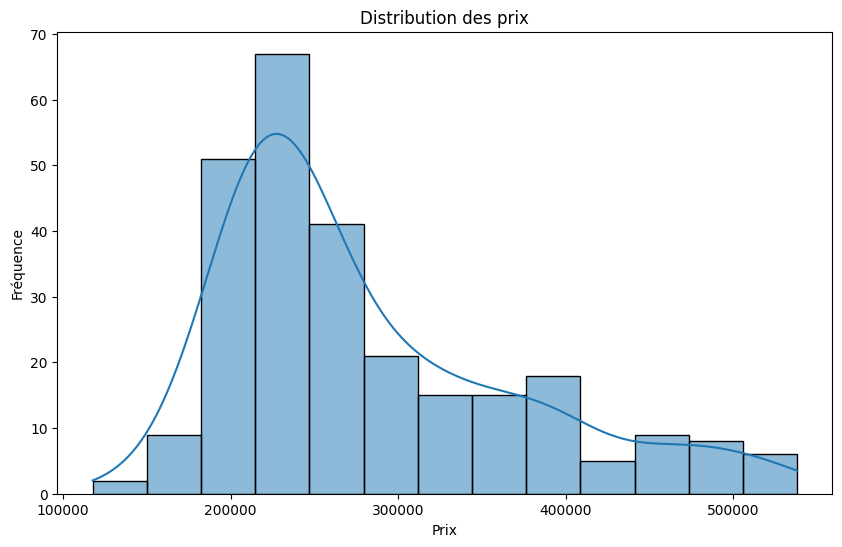

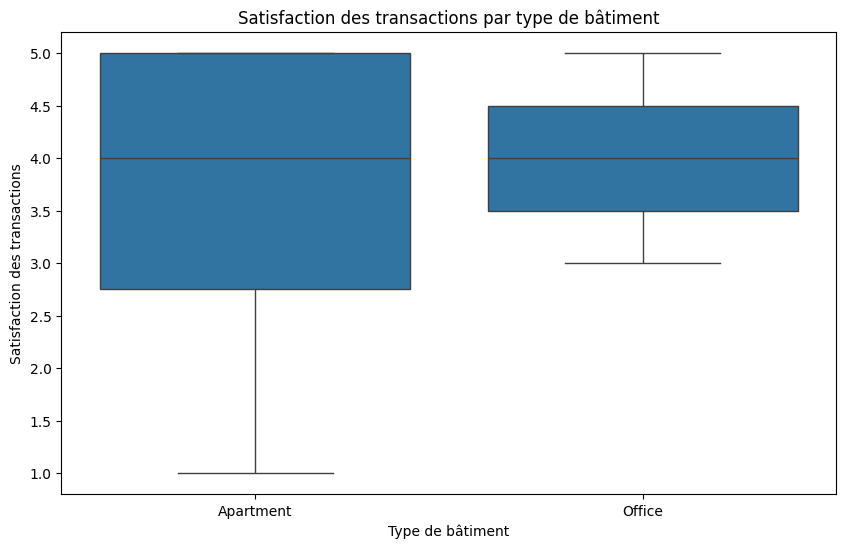

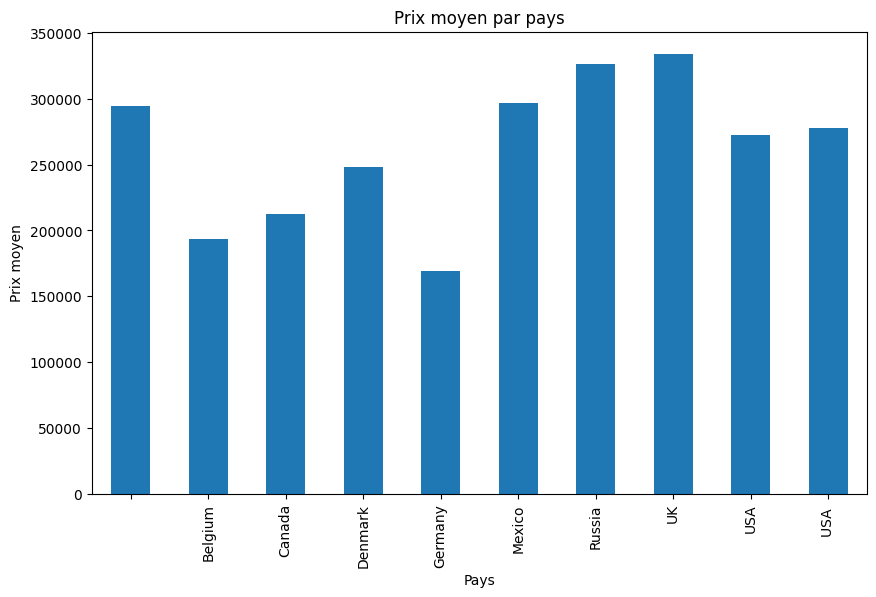

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df_combine['price'], kde=True)
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

# Boxplot de la satisfaction des transactions par type de bâtiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combine, x='type', y='deal_satisfaction')
plt.title("Satisfaction des transactions par type de bâtiment")
plt.xlabel("Type de bâtiment")
plt.ylabel("Satisfaction des transactions")
plt.show()

# Graphique en barres pour les performances par pays
plt.figure(figsize=(10, 6))
country_performance.set_index('country')['price']['mean'].plot(kind='bar')
plt.title("Prix moyen par pays")
plt.xlabel("Pays")
plt.ylabel("Prix moyen")
plt.show()


### Analyse des données

In [205]:
# la colonne 'birth_date' est au format datetime?
df_combine['birth_date'] = pd.to_datetime(df_combine['birth_date'], errors='coerce')

# Calcul de l'âge en années
df_combine['age'] = (pd.to_datetime('today') - df_combine['birth_date']).dt.days // 365

# Affichage des premières lignes pour vérifier
df_combine[['customerid', 'birth_date', 'age']].head()


,customerid,birth_date,age
0,C0028,1968-05-11,56
1,C0027,1962-11-26,62
2,C0112,1959-04-07,65
3,C0160,1959-11-25,65
4,C0014,1963-07-15,61


In [206]:
# Définition des intervalles d'âge
age_bins = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
age_labels = ["(19.0, 25.0]", "(25.0, 31.0]", "(31.0, 36.0]", "(36.0, 42.0]", 
              "(42.0, 48.0]", "(48.0, 54.0]", "(54.0, 59.0]", "(59.0, 65.0]", 
              "(65.0, 71.0]", "(71.0, 76.0]"]

# Créer une nouvelle colonne 'age_group' avec les intervalles
df_combine['age_group'] = pd.cut(df_combine['age'], bins=age_bins, labels=age_labels, right=True)

# Affichage des fréquences des groupes d'âge
age_distribution = df_combine['age_group'].value_counts().sort_index()
print("\nDistribution des âges:")
print(age_distribution)



Distribution des âges:
age_group
(19.0, 25.0]      0
(25.0, 31.0]      0
(31.0, 36.0]      0
(36.0, 42.0]      6
(42.0, 48.0]     13
(48.0, 54.0]     23
(54.0, 59.0]     30
(59.0, 65.0]    139
(65.0, 71.0]     17
(71.0, 76.0]     15
Name: count, dtype: int64


In [207]:
# Définir les intervalles de prix
price_bins = pd.cut(df_combine['price'], bins=10)

# Afficher la répartition des prix dans les 10 intervalles
price_distribution = pd.cut(df_combine['price'], bins=10).value_counts().sort_index()
print("\nRépartition des prix des propriétés dans 10 intervalles:")
print(price_distribution)



Répartition des prix des propriétés dans 10 intervalles:
price
(117143.362, 159634.837]     3
(159634.837, 201705.604]    32
(201705.604, 243776.371]    88
(243776.371, 285847.138]    47
(285847.138, 327917.905]    31
(327917.905, 369988.672]    18
(369988.672, 412059.439]    21
(412059.439, 454130.206]     7
(454130.206, 496200.973]    11
(496200.973, 538271.74]      9
Name: count, dtype: int64


In [208]:
# Calcul de la moyenne des prix par groupe d'âge et remplacer les NaN par 0
age_price_relation = df_combine.groupby('age_group')['price'].mean().reset_index()

# Remplacer les NaN par 0
age_price_relation['price'] = age_price_relation['price'].fillna(0)

# Afficher la relation entre l'âge et le prix moyen
print("\nRelation entre l'âge et le prix moyen des propriétés (avec NaN remplacé par 0):")
print(age_price_relation)



Relation entre l'âge et le prix moyen des propriétés (avec NaN remplacé par 0):
      age_group          price
0  (19.0, 25.0]       0.000000
1  (25.0, 31.0]       0.000000
2  (31.0, 36.0]       0.000000
3  (36.0, 42.0]  317513.485000
4  (42.0, 48.0]  270180.041538
5  (48.0, 54.0]  248984.314348
6  (54.0, 59.0]  264549.816000
7  (59.0, 65.0]  290507.039784
8  (65.0, 71.0]  244989.204706
9  (71.0, 76.0]  273968.017333


C:\Users\user\AppData\Local\Temp\ipykernel_12680\1776873329.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_price_relation = df_combine.groupby('age_group')['price'].mean().reset_index()


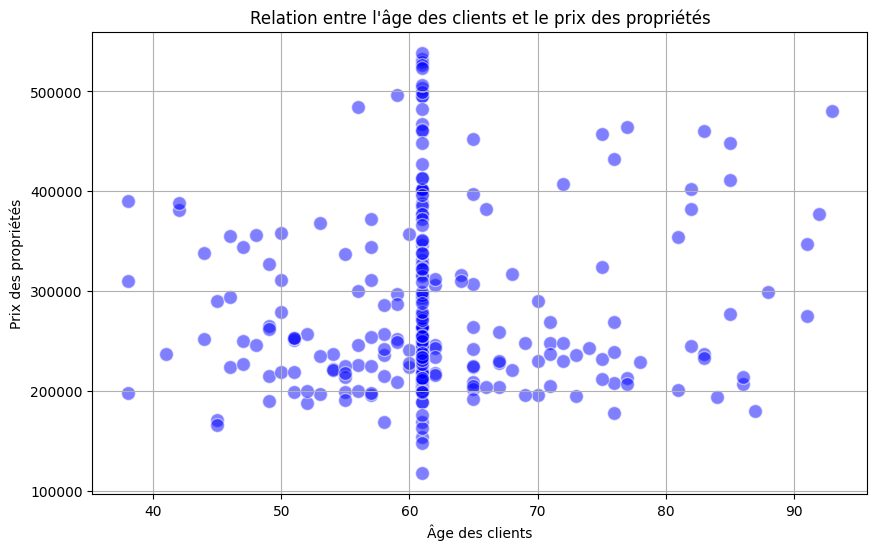

In [209]:
import matplotlib.pyplot as plt

# Tracer un graphique de la relation entre l'âge et le prix
plt.figure(figsize=(10, 6))
plt.scatter(df_combine['age'], df_combine['price'], alpha=0.5, color='blue', edgecolors='w', s=100)
plt.title('Relation entre l\'âge des clients et le prix des propriétés')
plt.xlabel('Âge des clients')
plt.ylabel('Prix des propriétés')
plt.grid(True)
plt.show()


In [210]:
# Calcul de la corrélation entre l'âge et le prix
correlation = df_combine[['age', 'price']].corr()
print("\nMatrice de corrélation entre l'âge et le prix:")
print(correlation)



Matrice de corrélation entre l'âge et le prix:
            age     price
age    1.000000  0.069961
price  0.069961  1.000000


#### Satisfaction moyenne des transactions pour chaque pays et par État

C:\Users\user\AppData\Local\Temp\ipykernel_12680\2283001496.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_satisfaction = df_combine.groupby('country')['deal_satisfaction'].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_12680\2283001496.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='deal_satisfaction', y='country', data=country_satisfaction, palette='viridis')


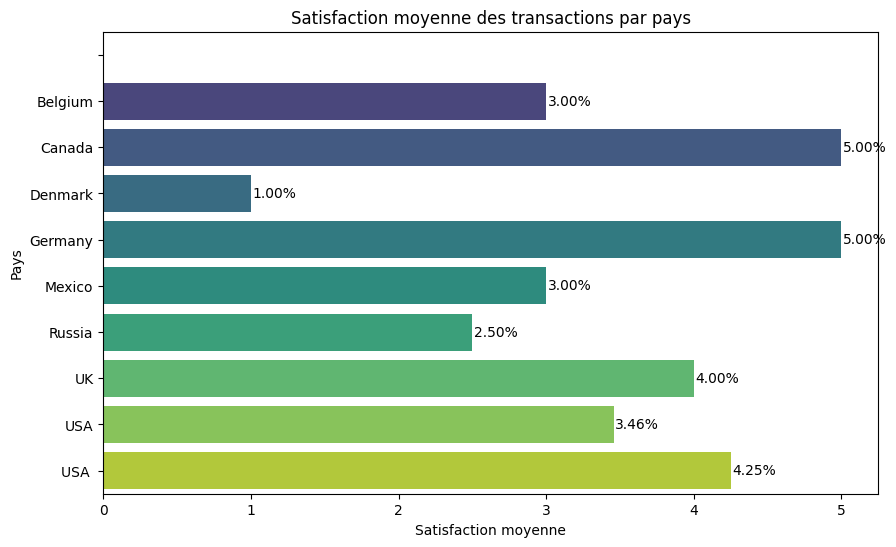

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Satisfaction moyenne des transactions par pays
country_satisfaction = df_combine.groupby('country')['deal_satisfaction'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='deal_satisfaction', y='country', data=country_satisfaction, palette='viridis')
plt.title('Satisfaction moyenne des transactions par pays')
plt.xlabel('Satisfaction moyenne')
plt.ylabel('Pays')

# Ajouter les pourcentages au-dessus des barres
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}%', 
                 (p.get_width() + 0.01, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center', 
                 fontsize=10, color='black')

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12680\1701965517.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_satisfaction = df_combine.groupby('state')['deal_satisfaction'].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_12680\1701965517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='deal_satisfaction', y='state', data=state_satisfaction, palette='coolwarm')


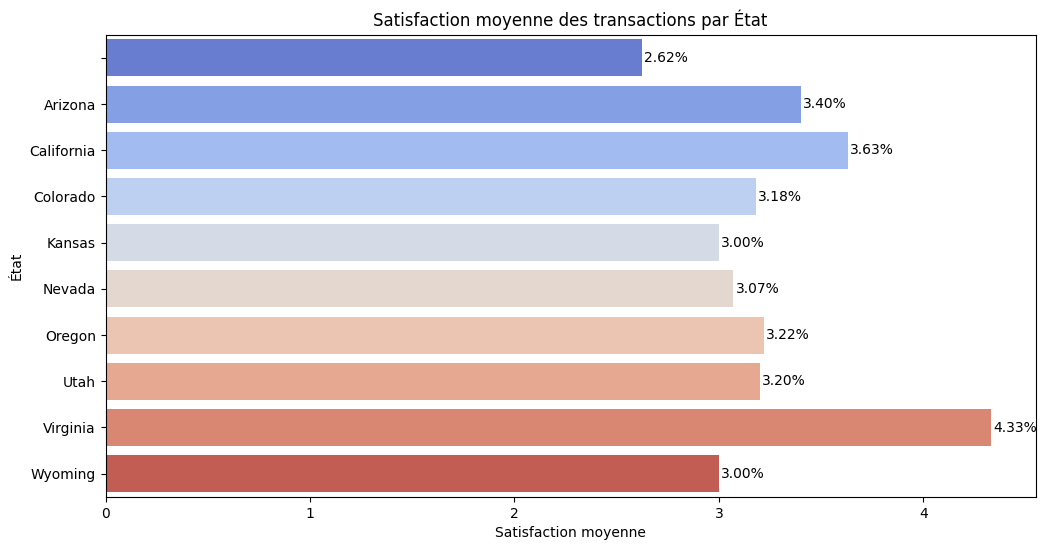

In [212]:
# Satisfaction moyenne des transactions par état
state_satisfaction = df_combine.groupby('state')['deal_satisfaction'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='deal_satisfaction', y='state', data=state_satisfaction, palette='coolwarm')
plt.title('Satisfaction moyenne des transactions par État')
plt.xlabel('Satisfaction moyenne')
plt.ylabel('État')

# Ajouter les pourcentages au-dessus des barres
for p in ax2.patches:
    ax2.annotate(f'{p.get_width():.2f}%', 
                 (p.get_width() + 0.01, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center', 
                 fontsize=10, color='black')

plt.show()


In [225]:
df_combine.columns

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source', 'Unnamed: 0', '﻿id', 'building', 'date_sale', 'type',
       'property#', 'area', 'price', 'status', 'customerid', 'price_cumsum',
       'age', 'age_group'],
      dtype='object')

#### Chiffre d'affaires mensuel de l'entreprise

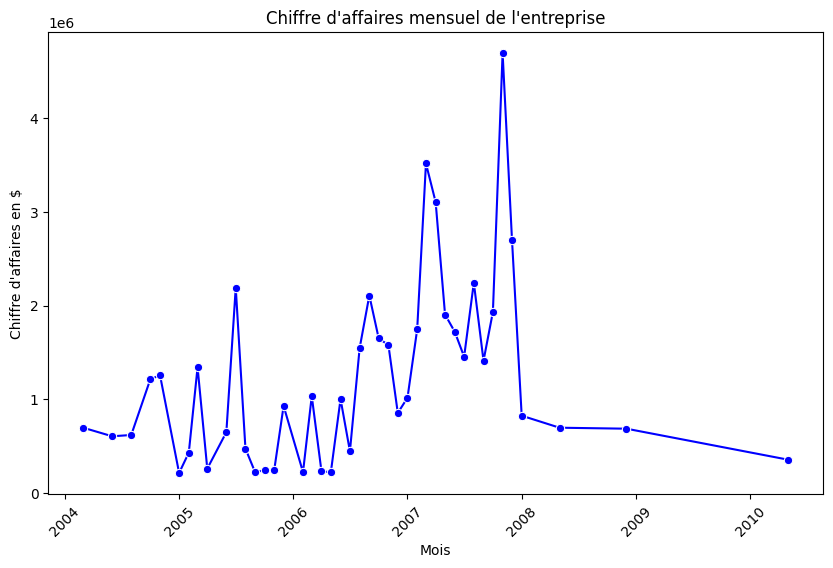

In [226]:
# Si ce n'est pas déjà fait, convertir 'date' en datetime
df_combine['date_sale'] = pd.to_datetime(df_combine['date_sale'], errors='coerce')

# Extraire le mois et l'année
df_combine['month'] = df_combine['date_sale'].dt.to_period('M')

# Calcul du chiffre d'affaires mensuel
monthly_revenue = df_combine.groupby('month')['price'].sum().reset_index()

# Convertir la colonne 'month' en timestamp pour le tracé
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

# Visualisation du chiffre d'affaires mensuel
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', data=monthly_revenue, marker='o', color='blue')
plt.title('Chiffre d\'affaires mensuel de l\'entreprise')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires en $')
plt.xticks(rotation=45)
plt.show()


#### Combien d’appartements sont vendus dans chaque État ?


C:\Users\user\AppData\Local\Temp\ipykernel_12680\283836410.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_sales_count = df_combine.groupby('state')['type'].apply(lambda x: (x == 'Apartment').sum()).reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_12680\283836410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='type', data=state_sales_count, palette='Set2')


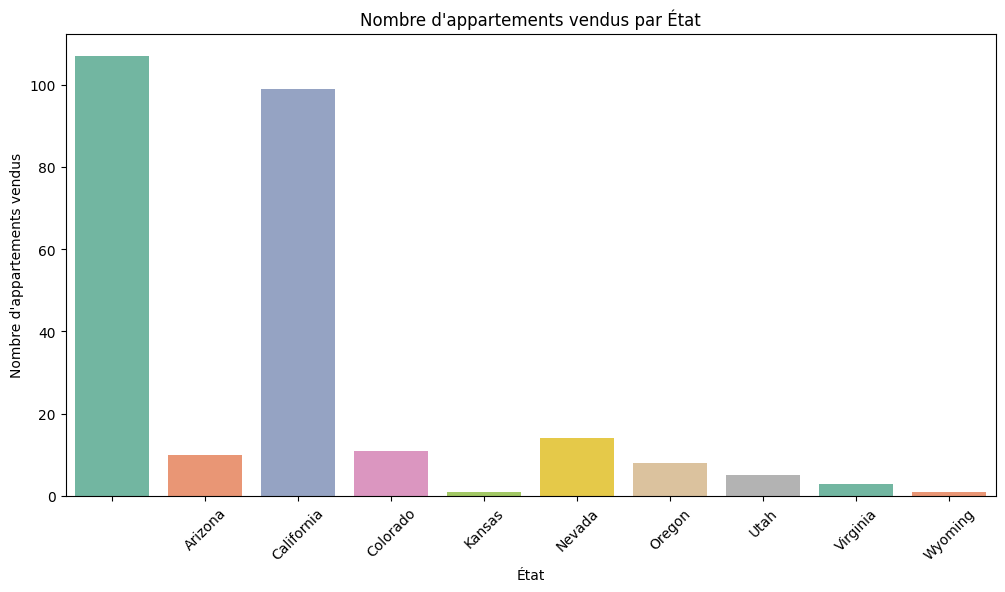

In [231]:
# Calcul du nombre d'appartements vendus dans chaque État
state_sales_count = df_combine.groupby('state')['type'].apply(lambda x: (x == 'Apartment').sum()).reset_index()

# Visualisation du nombre d'appartements vendus par État
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='type', data=state_sales_count, palette='Set2')
plt.title('Nombre d\'appartements vendus par État')
plt.xlabel('État')
plt.ylabel('Nombre d\'appartements vendus')
plt.xticks(rotation=45)
plt.show()


In [236]:
df_combine.columns

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source', 'Unnamed: 0', '﻿id', 'building', 'date_sale', 'type',
       'property#', 'area', 'price', 'status', 'customerid', 'price_cumsum',
       'age', 'age_group', 'month', 'year'],
      dtype='object')

#### Répartition par âge des clients


C:\Users\user\AppData\Local\Temp\ipykernel_12680\1515745030.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df_combine, palette='viridis')


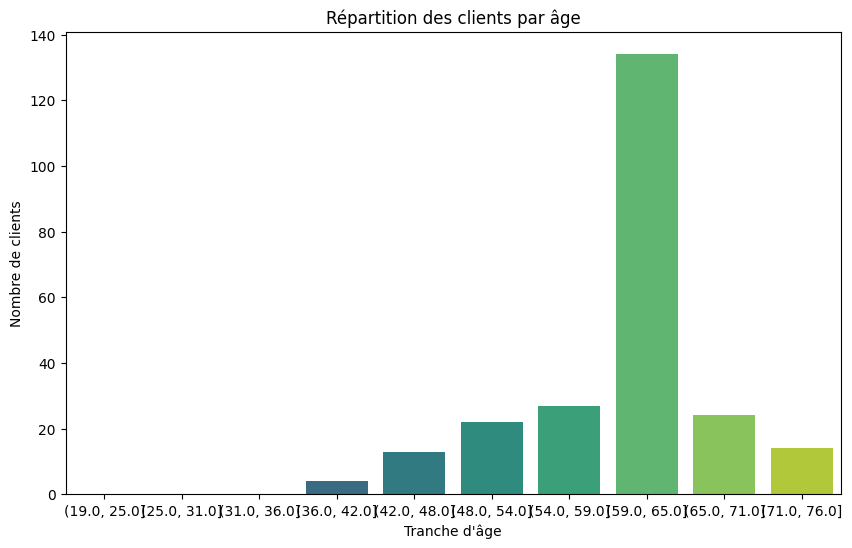

In [237]:
# Créer une nouvelle colonne pour l'âge des clients
df_combine['age'] = (pd.to_datetime('today') - df_combine['birth_date']).dt.days / 365

# Définir les intervalles d'âge
bins = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
labels = ['(19.0, 25.0]', '(25.0, 31.0]', '(31.0, 36.0]', '(36.0, 42.0]', '(42.0, 48.0]',
          '(48.0, 54.0]', '(54.0, 59.0]', '(59.0, 65.0]', '(65.0, 71.0]', '(71.0, 76.0]']

df_combine['age_group'] = pd.cut(df_combine['age'], bins=bins, labels=labels, right=True)

# Visualisation de la répartition par âge
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df_combine, palette='viridis')
plt.title('Répartition des clients par âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de clients')
plt.show()


#### Ventes annuelles de chaque bâtiment

C:\Users\user\AppData\Local\Temp\ipykernel_12680\455989197.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_sales = df_combine.groupby(['year', 'type'])['price'].sum().reset_index()


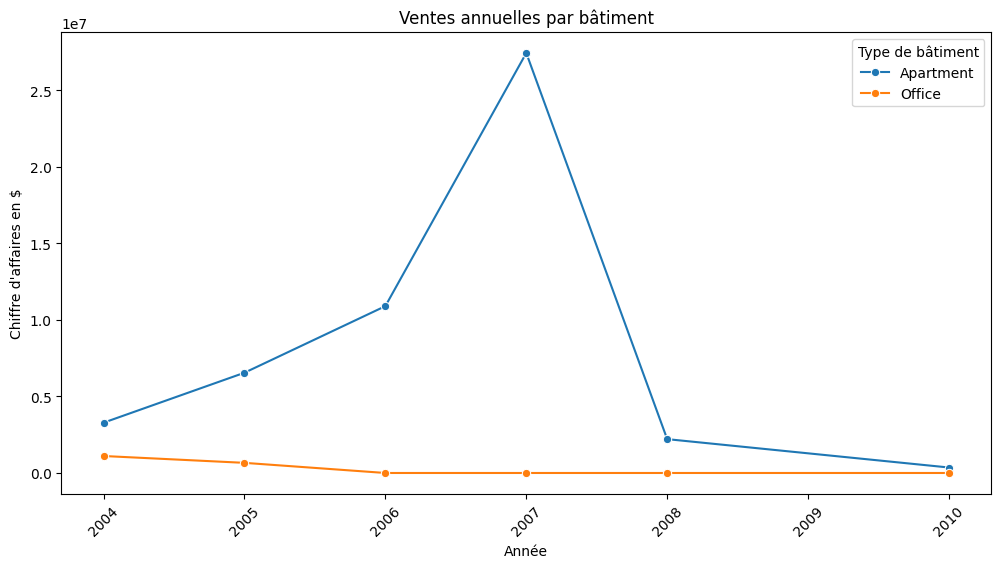

In [239]:
# Extraire l'année de la date
df_combine['year'] = df_combine['date_sale'].dt.year

# Calcul des ventes annuelles par bâtiment
annual_sales = df_combine.groupby(['year', 'type'])['price'].sum().reset_index()

# Visualisation des ventes annuelles par bâtiment
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', hue='type', data=annual_sales, marker='o')
plt.title('Ventes annuelles par bâtiment')
plt.xlabel('Année')
plt.ylabel('Chiffre d\'affaires en $')
plt.xticks(rotation=45)
plt.legend(title='Type de bâtiment')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Questions / Reponses

In [213]:
# Supposons que les colonnes soient 'building_type' et 'square_feet'
df_combine["country"]== "Mexico"


0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Name: country, Length: 267, dtype: bool

In [214]:
average_size_type_1 = df_combine[df_combine['building'] == 1]['area'].mean()
print(average_size_type_1)

928.0388461538461


In [215]:
# Trouver le type de propriété le plus vendu
most_sold_property_type = df_combine['type'].value_counts().idxmax()
print(most_sold_property_type)


Apartment


In [216]:
# Calcul du prix moyen par bâtiment
average_price_per_building = df_combine.groupby('building')['price'].mean().reset_index()

# Trouver le bâtiment avec le prix moyen le plus élevé
highest_price_building = average_price_per_building.loc[average_price_per_building['price'].idxmax()]
print(highest_price_building)


building         4.000000
price       290239.515581
Name: 3, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12680\1591231731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_per_building = df_combine.groupby('building')['price'].mean().reset_index()


In [217]:
# Calcul du prix moyen des bâtiments au Mexique
average_price_mexico = df_combine[df_combine['country'] == 'Mexico']['price'].mean()
print(average_price_mexico)


297008.97


In [218]:
# Calculer le nombre de propriétés vendues par état
state_sales = df_combine['state'].value_counts()

# Trouver l'état avec le deuxième plus grand nombre de ventes
second_highest_state = state_sales.index[1]  # L'index de la deuxième valeur la plus élevée
print(f"L'état avec le deuxième plus grand nombre de ventes est : {second_highest_state}")

L'état avec le deuxième plus grand nombre de ventes est : California


In [219]:
# Créer des tranches d'âge
age_bins = [30, 36, 42, 48, 54]
age_labels = ['31-36', '36-42', '42-48', '48-54']
df_combine['age_group'] = pd.cut(df_combine['age'], bins=age_bins, labels=age_labels, right=False)

# Trouver la tranche d'âge la plus courante
most_common_age_group = df_combine['age_group'].value_counts().idxmax()
print(most_common_age_group)


48-54


In [220]:
# Diviser la colonne 'price' en 10 intervalles égaux
price_bins = pd.cut(df_combine['price'], bins=10)

# Compter les propriétés dans l'intervalle spécifié
unsold_properties_last_interval = df_combine[(df_combine['price'] >= 496201) & (df_combine['price'] <= 538272)].shape[0]
print(unsold_properties_last_interval)


9


In [221]:
# Calculer la corrélation entre l'âge et le prix
correlation = df_combine[['age', 'price']].corr().iloc[0, 1]
print(correlation)


0.06996070786356888


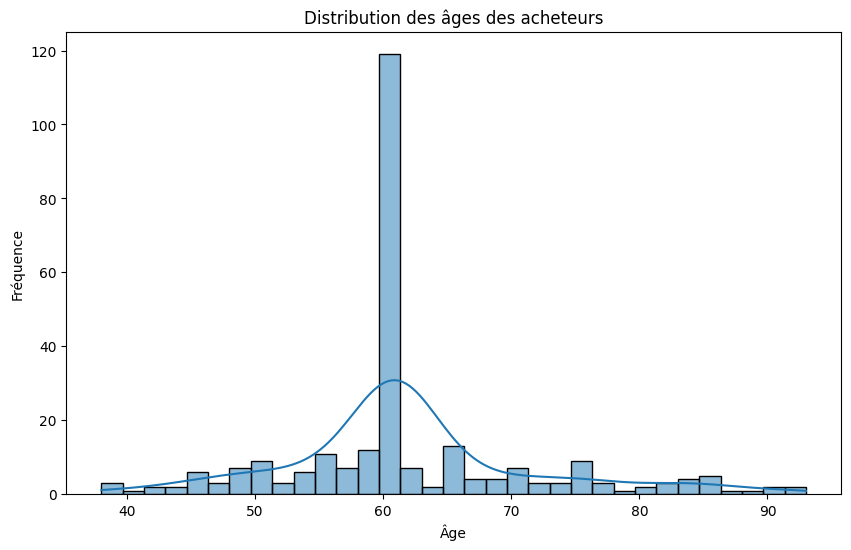

In [222]:
# Histogramme de la distribution par âge
plt.figure(figsize=(10, 6))
sns.histplot(df_combine['age'], kde=True)
plt.title('Distribution des âges des acheteurs')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


In [227]:
# Filtrer les données pour l'année 2004
sales_2004 = df_combine[df_combine['date_sale'] == 2004]

# Calculer les ventes totales par bâtiment
sales_per_building_2004 = sales_2004.groupby('building')['price'].sum().reset_index()

# Trouver le bâtiment avec les ventes les plus élevées
highest_sales_building_2004 = sales_per_building_2004.loc[sales_per_building_2004['price'].idxmax()]
print(highest_sales_building_2004)


building    1.0
price       0.0
Name: 0, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12680\3941903046.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_per_building_2004 = sales_2004.groupby('building')['price'].sum().reset_index()


In [230]:
# Calculer le chiffre d'affaires par état
state_revenue = df_combine.groupby('state')['price'].sum().reset_index()

# Trier par prix décroissant (du plus grand au plus petit)
df_sorted = state_revenue.sort_values(by='price', ascending=False)

# Afficher le DataFrame trié
print(df_sorted)

        state        price
0              33162964.90
2  California  26905274.37
5      Nevada   3561754.11
1     Arizona   3156741.70
6      Oregon   2841493.76
3    Colorado   2726587.29
7        Utah   1155107.87
8    Virginia    987415.78
4      Kansas    367976.46
9     Wyoming    207581.43


C:\Users\user\AppData\Local\Temp\ipykernel_12680\2877075640.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_revenue = df_combine.groupby('state')['price'].sum().reset_index()


In [228]:
# Calcul du chiffre d'affaires par année
df_combine['year'] = df_combine['date_sale'].dt.year  # Assurez-vous que la colonne 'date' est correcte

# Calcul du chiffre d'affaires annuel
annual_revenue = df_combine.groupby('year')['price'].sum().reset_index()

# Filtrer les années demandées (2004, 2007, 2008, 2009)
selected_years = annual_revenue[annual_revenue['year'].isin([2004, 2007, 2008, 2009])]

# Trouver l'année avec le chiffre d'affaires le plus élevé
max_revenue_year = selected_years.loc[selected_years['price'].idxmax()]

print(f"L'année ayant généré le chiffre d'affaires le plus élevé est : {max_revenue_year['year']}")


L'année ayant généré le chiffre d'affaires le plus élevé est : 2007.0


C:\Users\user\AppData\Local\Temp\ipykernel_12680\3976840119.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_sales_by_building = df_combine.groupby(['date_sale', 'type'])['price'].sum().reset_index()


<Figure size 1200x800 with 0 Axes>

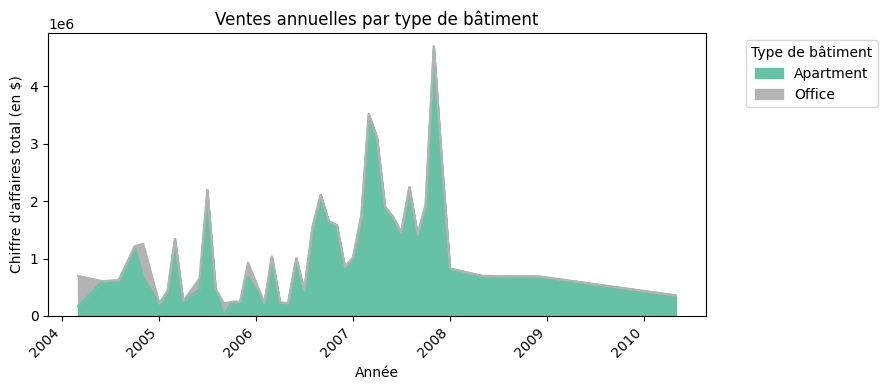

In [229]:
# Calcul des ventes annuelles par type de bâtiment
annual_sales_by_building = df_combine.groupby(['date_sale', 'type'])['price'].sum().reset_index()

# Créer un pivot pour que chaque type de bâtiment soit une colonne
sales_pivot = annual_sales_by_building.pivot(index='date_sale', columns='type', values='price')

# Visualisation des ventes annuelles par type de bâtiment avec un graphique en aires empilées
plt.figure(figsize=(12, 8))
sales_pivot.plot(kind='area', stacked=True, figsize=(9, 4), cmap='Set2')

plt.title('Ventes annuelles par type de bâtiment')
plt.xlabel('Année')
plt.ylabel('Chiffre d\'affaires total (en $)')
plt.legend(title='Type de bâtiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
